<a href="https://colab.research.google.com/github/wipes7/Homework/blob/main/HW2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 44ms/step - loss: 0.4973 - accuracy: 0.7841 - val_loss: 0.3708 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2930 - accuracy: 0.9045 - val_loss: 0.3057 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2168 - accuracy: 0.9301 - val_loss: 0.2851 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1693 - accuracy: 0.9457 - val_loss: 0.2999 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1357 - accuracy: 0.9589 - val_loss: 0.2893 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1146 - accuracy: 0.9640 - val_loss: 0.3005 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0959 - accuracy: 0.9722 - val_loss: 0.3162 - val_accuracy: 0.8824
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [10]:
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


model2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4437 - accuracy: 0.5000
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2544 - accuracy: 0.5000
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1988 - accuracy: 0.5000
Epoch 4/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1647 - accuracy: 0.5000


### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

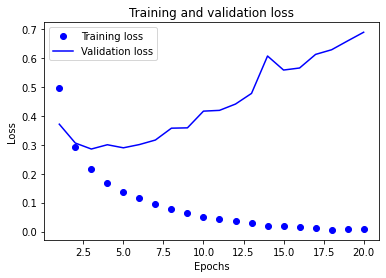

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.6427 - accuracy: 0.5022 - val_loss: 0.5547 - val_accuracy: 0.4967
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5394 - accuracy: 0.5022 - val_loss: 0.4641 - val_accuracy: 0.4967
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4696 - accuracy: 0.5022 - val_loss: 0.3876 - val_accuracy: 0.4967
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4086 - accuracy: 0.5022 - val_loss: 0.3362 - val_accuracy: 0.4967
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3628 - accuracy: 0.5022 - val_loss: 0.3086 - val_accuracy: 0.4967
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3157 - accuracy: 0.5022 - val_loss: 0.2887 - val_accuracy: 0.4967
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2798 - accuracy: 0.5022 - val_loss: 0.2820 - val_accuracy: 0.4967
Epoch 8/20
30

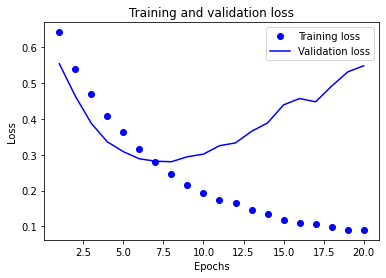

In [12]:

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="softmax")
])
model2_dr.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model2_dr.fit(
    x_train, y_train,
    epochs=20, batch_size=512, validation_split=0.4)

import matplotlib.pyplot as plt
history_dict = history_dropout.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [13]:
from tensorflow.keras import regularizers
model2_reg = keras.Sequential([
    layers.Dense(16, activation="relu"),
        layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(1, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6271 - accuracy: 0.5022 - val_loss: 0.4945 - val_accuracy: 0.4967
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4142 - accuracy: 0.5022 - val_loss: 0.4069 - val_accuracy: 0.4967
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3239 - accuracy: 0.5022 - val_loss: 0.3691 - val_accuracy: 0.4967
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2695 - accuracy: 0.5022 - val_loss: 0.3618 - val_accuracy: 0.4967
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2323 - accuracy: 0.5022 - val_loss: 0.3686 - val_accuracy: 0.4967
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2021 - accuracy: 0.5022 - val_loss: 0.3686 - val_accuracy: 0.4967
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1817 - accuracy: 0.5022 - val_loss: 0.3794 - val_accuracy: 0.4967
Epoch 8/20
30

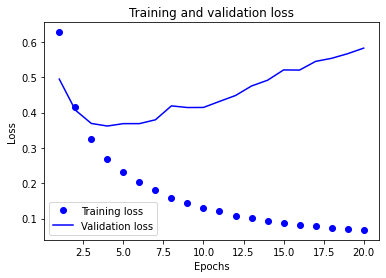

In [14]:
model2_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model2_reg.fit(
    x_train, y_train,
    epochs=20, batch_size=512, validation_split=0.4)

import matplotlib.pyplot as plt
history_dict = history_l2_reg.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Dropout model's training loss is getting smaller and there is a certain point to prevent overfitting. But in l1 model, there is no certain point.  